# [Thapar Summer School 2025 | Hack-II](https://www.kaggle.com/competitions/thapar-summer-school-2025-hack-ii/)

TIPS:-
1. Use ChatGPT for GUIDANCE & LEARNing - What model / feature CAN work on certain data?
2. Hill Climbing, Optuna
3. Winning Notebooks of multiple competitions
4. FEATURE ENGINEERING
5. Understand the basics of how the models work.

---

In [1]:
# !kaggle competitions download -c thapar-summer-school-2025-hack-ii

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_train = pd.read_csv("train.csv", index_col="id")
df_train.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,,
0,68.0,12.5,0.25,0.25,0.25,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.421449,0.403129,31.394569,4952.01304
1,514.0,25.0,0.50,0.25,0.50,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.586603,0.490020,40.282376,7532.82953
2,547.0,12.5,0.25,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.483671,0.411591,34.781055,5715.00840
3,535.0,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.429001,0.398864,31.119881,4575.76991
4,223.0,12.5,0.25,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.546136,0.475965,39.096884,6801.32393


In [4]:
df_test = pd.read_csv("test.csv", index_col="id")
df_test.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,,
15000,316.0,12.5,0.25,0.25,0.75,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.468192,0.418220,34.137585
15001,241.0,12.5,0.25,0.25,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.427006,0.399172,31.383381
15002,451.0,12.5,0.25,0.38,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.578557,0.486889,40.028213
15003,6.0,37.5,0.75,0.25,0.25,0.25,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.430444,0.408851,29.370607
15004,603.0,25.0,0.50,0.25,0.75,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.443420,0.417947,33.957977


In [5]:
df = pd.concat([df_train, df_test], axis=0)
df.iloc[14998:15003, :]

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,,
14998,751.0,25.0,0.50,0.38,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.470643,0.438875,33.847079,5791.45673
14999,126.0,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.249335,0.358821,27.345454,2605.69676
15000,316.0,12.5,0.25,0.25,0.75,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.468192,0.418220,34.137585,NaN
15001,241.0,12.5,0.25,0.25,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.427006,0.399172,31.383381,NaN
15002,451.0,12.5,0.25,0.38,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.578557,0.486889,40.028213,NaN


In [6]:
df.shape

(25000, 18)

### Interpreted Terminologies:-
**Row#** = Row number in which farmer has planted the crop in the field (May not be needed)

**Clone Size** = Size of plants / Number of gametes grown through ASEXUAL REPRODUCTION (CLONING)
(*Maybe larger clones are more attractive to pollinators?*)

**honeybee, bumbles, andrena, osmia** = Pollinator visiting rates

**Max/Min/AverageOfUpperTRange** = Temperature range during PEAK FLOWERING season

**Max/Min/AverageOfLowerTRange** = Temperature range during PRE-FLOWERING season

**RainingDays, AverageRainingDays** = How many days it rained during observation window

**fruitset** = Fraction of flowers that turned into fruits (Success rate of pollination)

**fruitmass** = Average mass of fruits (Productivity indicator)

**seeds** = Avg no of seeds per fruit (Pollination effectiveness)

**yield** = Total yield per plant/plot/row

## Basic Data Cleaning

In [7]:
df.drop("yield", axis=1).isnull().any().any()

np.False_

In [8]:
df.duplicated().any()

np.False_

In [ ]:
df.index.duplicated().any()

np.False_

In [10]:
df["Row#"].duplicated().any()

np.True_

In [11]:
df[df["Row#"].duplicated()]

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,,
23,692.0,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.493693,0.446518,35.184412,6465.37205
29,416.0,12.5,0.25,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.626775,0.525136,46.139425,7617.39589
31,25.0,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.335530,0.378528,27.401755,3471.19214
46,589.0,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.560445,0.488812,40.265408,7044.56761
55,577.0,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.506104,0.454917,36.385433,6237.20605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,441.0,12.5,0.25,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.571708,0.485990,40.842385,NaN
24996,301.0,12.5,0.25,0.25,0.63,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.582483,0.487075,40.461331,NaN
24997,572.0,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.432912,0.405558,31.102535,NaN


In [12]:
df[df["Row#"] == 25]

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,,
15,25.0,25.0,0.25,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.320417,0.366977,27.345454,3049.26032
31,25.0,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.335530,0.378528,27.401755,3471.19214
3294,25.0,25.0,0.25,0.25,0.25,0.25,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.384711,0.391442,30.057704,3712.99786
6053,25.0,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.451292,0.423927,33.353221,4850.03746
7433,25.0,25.0,0.25,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.320417,0.367763,31.875182,2379.90521
7996,25.0,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.462997,0.435291,34.525258,5299.66133
8461,25.0,25.0,0.25,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.477941,0.416802,33.125467,5501.87808
8756,25.0,25.0,0.25,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.383787,0.399556,29.647861,3895.62684
9112,25.0,25.0,0.25,0.25,0.25,0.25,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.419015,0.381269,29.975398,4568.67217


In [13]:
df["Row#"] = df["Row#"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  25000 non-null  int64  
 1   clonesize             25000 non-null  float64
 2   honeybee              25000 non-null  float64
 3   bumbles               25000 non-null  float64
 4   andrena               25000 non-null  float64
 5   osmia                 25000 non-null  float64
 6   MaxOfUpperTRange      25000 non-null  float64
 7   MinOfUpperTRange      25000 non-null  float64
 8   AverageOfUpperTRange  25000 non-null  float64
 9   MaxOfLowerTRange      25000 non-null  float64
 10  MinOfLowerTRange      25000 non-null  float64
 11  AverageOfLowerTRange  25000 non-null  float64
 12  RainingDays           25000 non-null  float64
 13  AverageRainingDays    25000 non-null  float64
 14  fruitset              25000 non-null  float64
 15  fruitmass             25

In [14]:
# Checking if I can make Raining Days as integer
((df["RainingDays"] * 10) % 10 == 0).all()

np.False_

In [15]:
df.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,15000.000000
mean,428.524840,19.776121,0.385343,0.284309,0.48903,0.590761,82.140260,49.654156,68.630476,59.207528,28.650404,48.551952,18.693818,0.325446,0.500309,0.445610,36.072525,6007.246241
std,212.353714,6.647362,0.296805,0.058599,0.14772,0.144687,9.102439,5.518623,7.604434,6.579139,3.178983,5.364306,11.799806,0.165520,0.076504,0.037795,4.092802,1344.349065
min,0.000000,12.500000,0.000000,0.000000,0.00000,0.000000,55.800000,39.000000,41.200000,41.200000,24.300000,41.200000,1.000000,0.060000,0.132513,0.230749,22.079199,1637.704020
25%,253.000000,12.500000,0.250000,0.250000,0.38000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.450822,0.418056,33.232449,5063.851090
50%,467.000000,25.000000,0.500000,0.250000,0.50000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.505120,0.446435,36.016091,6109.850470
75%,596.000000,25.000000,0.500000,0.380000,0.63000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.561190,0.471665,39.081809,7016.893850
max,924.000000,40.000000,18.430000,0.585000,0.75000,0.750000,94.600000,57.200000,79.000000,77.400000,33.000000,62.000000,35.000000,0.560000,0.858981,0.854364,46.844107,8969.401840


## Creating baseline

In [16]:
df_train = df[~(df["yield"].isna())]
df_test = df[df["yield"].isna()].drop("yield", axis=1)

In [17]:
X = df_train.drop("yield", axis=1)
y = df_train["yield"]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Validation R²:", r2_score(y_valid, y_pred))

Mean Absolute Error (MAE): 320.08745957249363
Validation R²: -4.609222213585467


In [21]:
result = model.predict(df_test)
print(result)

[5401.35554886 4635.30787807 7314.42137237 ... 4662.17091729 6160.96057762
 7149.25632963]


In [22]:
df_result = df_test.copy()
df_result["yield"] = result
df_result.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,,
15000,316,12.5,0.25,0.25,0.75,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.468192,0.418220,34.137585,5401.355549
15001,241,12.5,0.25,0.25,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.427006,0.399172,31.383381,4635.307878
15002,451,12.5,0.25,0.38,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.578557,0.486889,40.028213,7314.421372
15003,6,37.5,0.75,0.25,0.25,0.25,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.430444,0.408851,29.370607,4670.977007
15004,603,25.0,0.50,0.25,0.75,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.443420,0.417947,33.957977,5068.545481


In [23]:
df_result["yield"].to_csv("result.csv")

In [24]:
# !kaggle competitions submit -c thapar-summer-school-2025-hack-ii -f result.csv -m "Message"

## EDA and Feature Engineering

<Figure size 2000x2000 with 0 Axes>

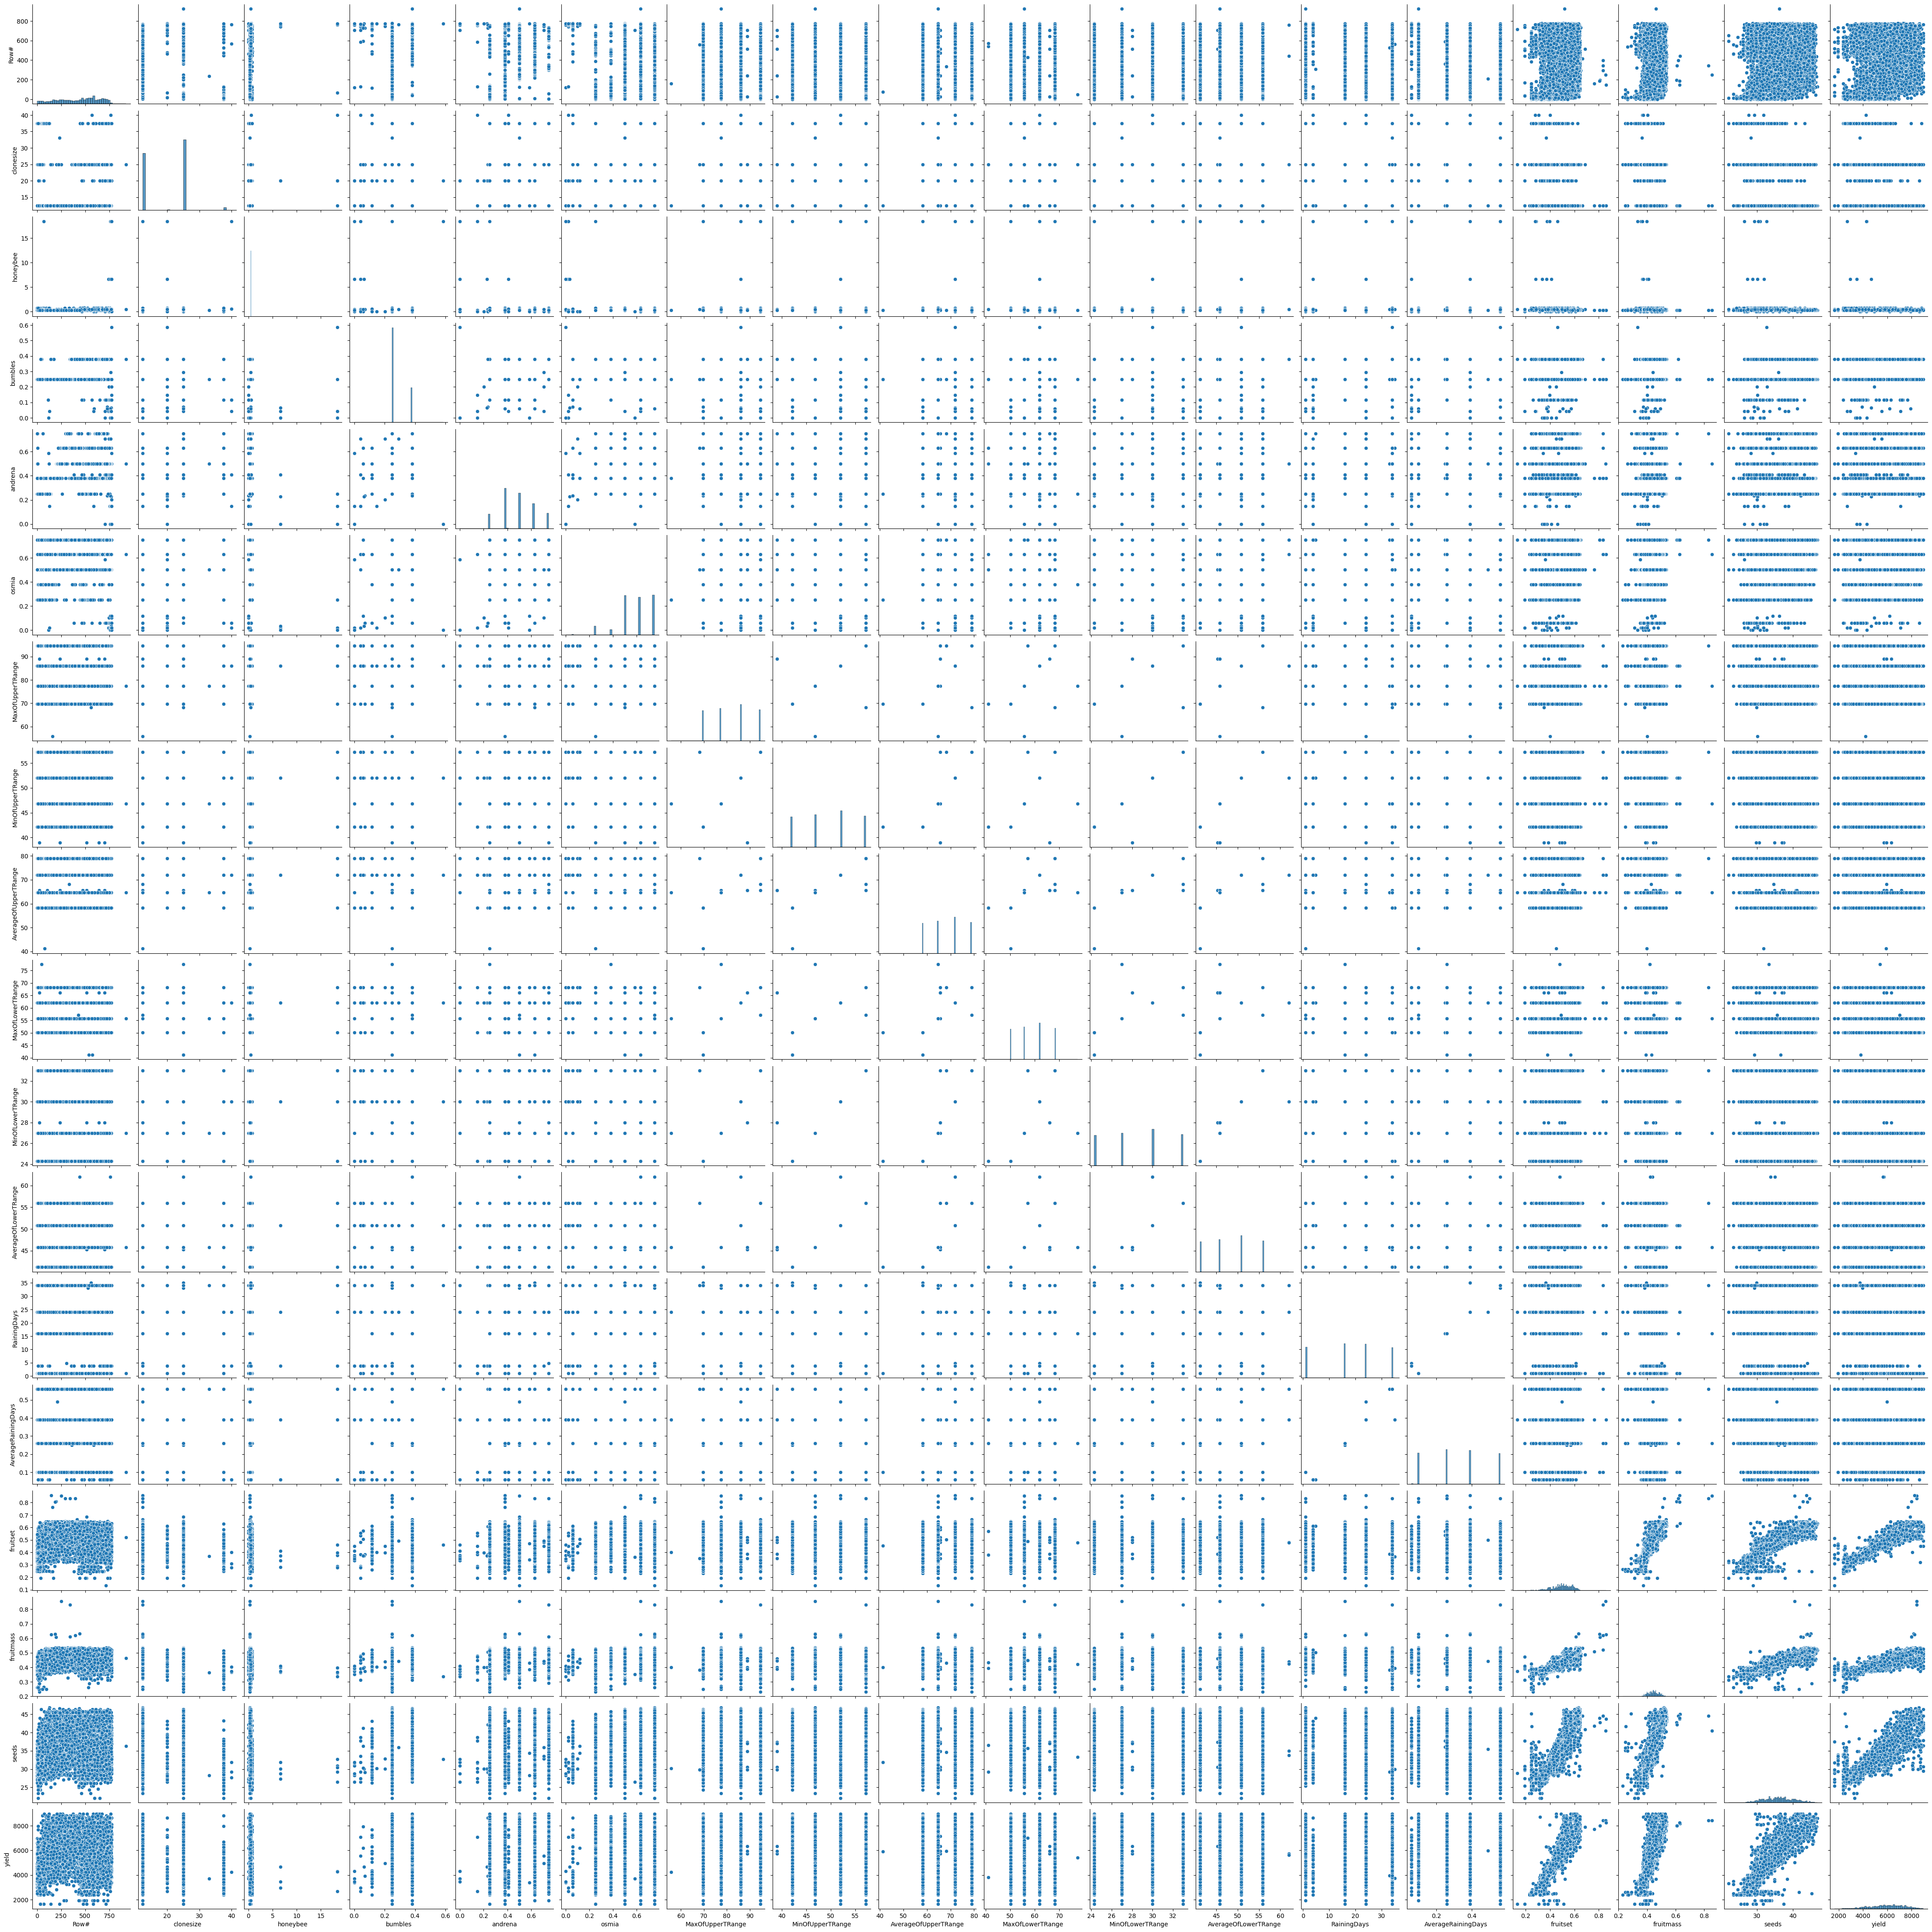

In [25]:
plt.figure(figsize=(20, 20))
sns.pairplot(data=df)
plt.show()

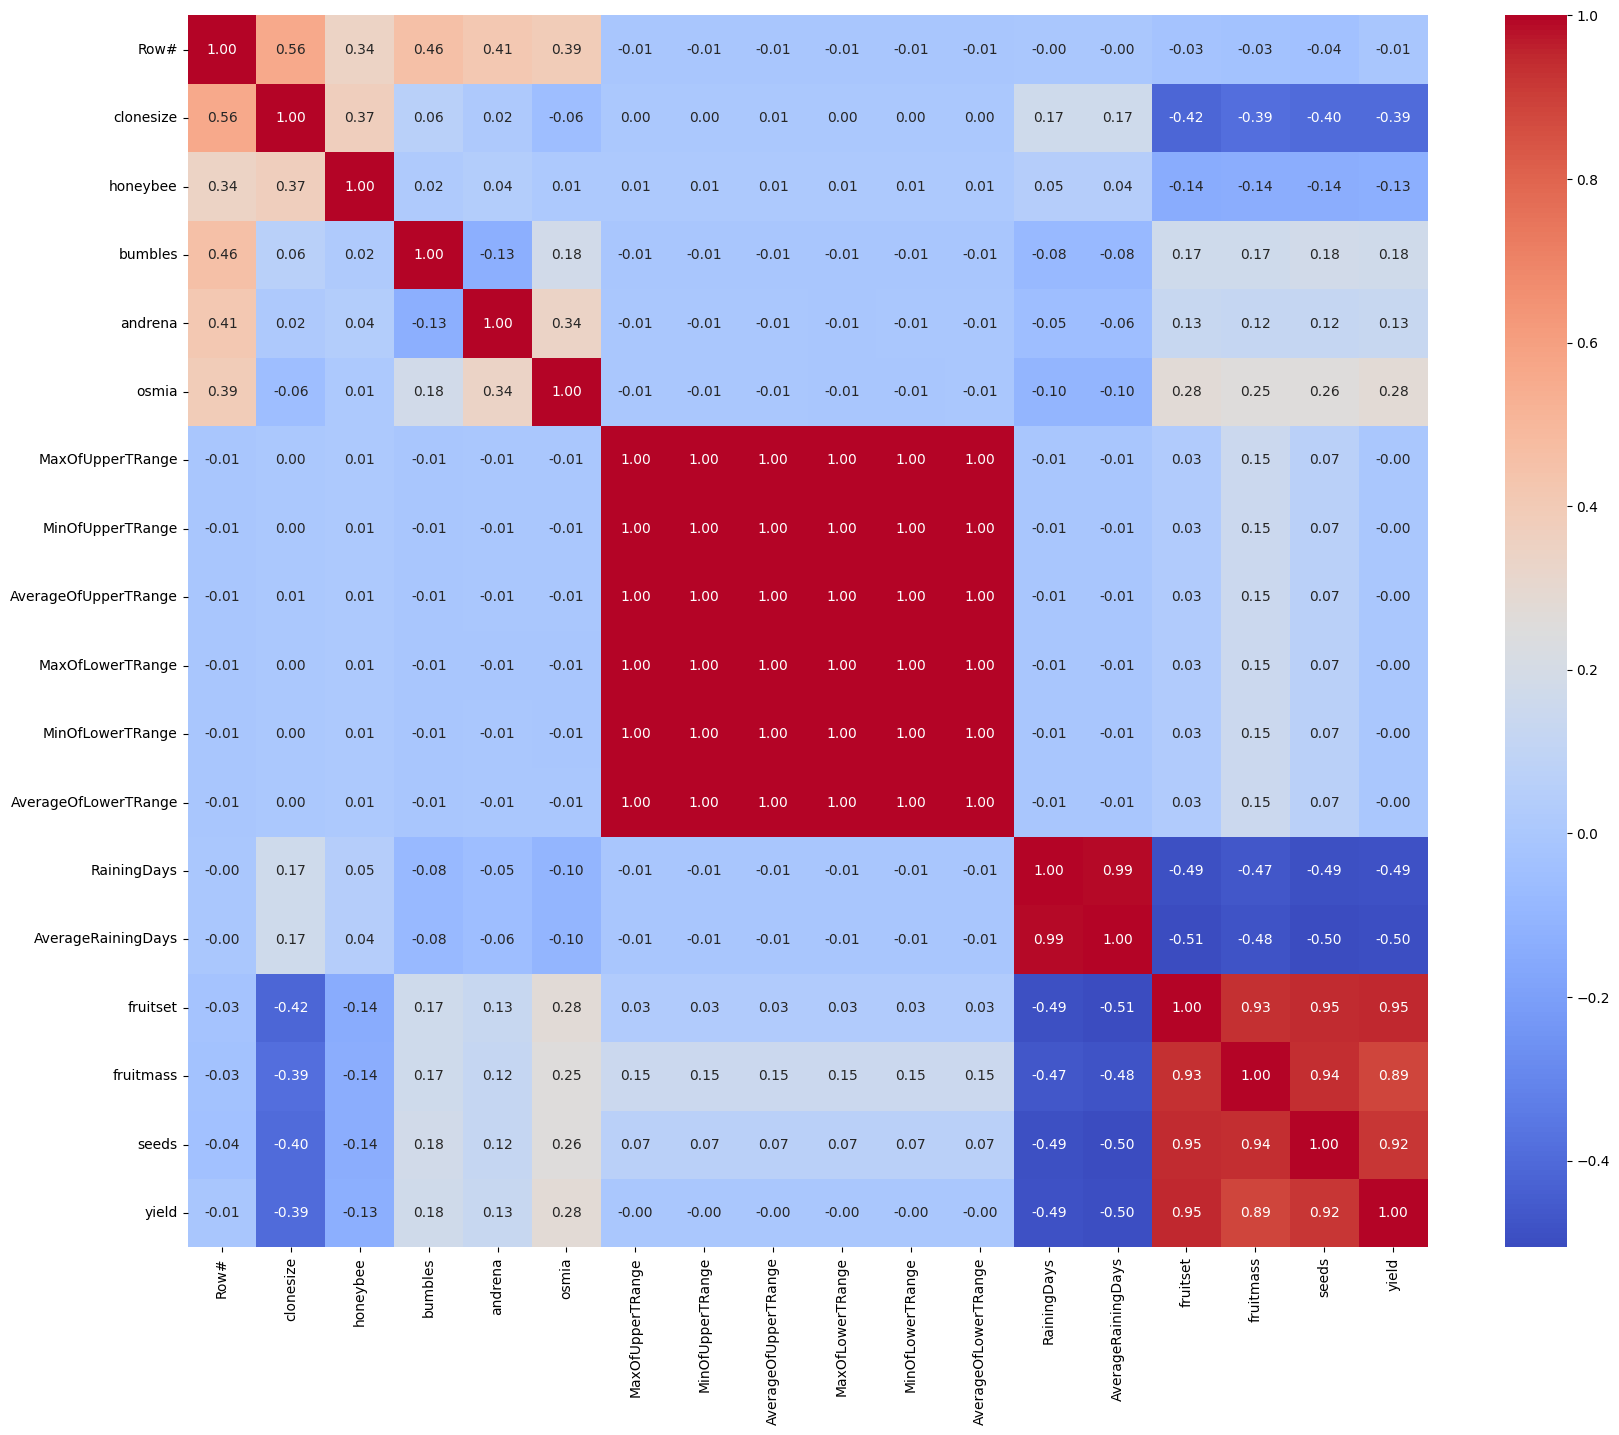

In [26]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

### Q. Is row# relevant?

Correlation between Row# and target yield is -0.0116


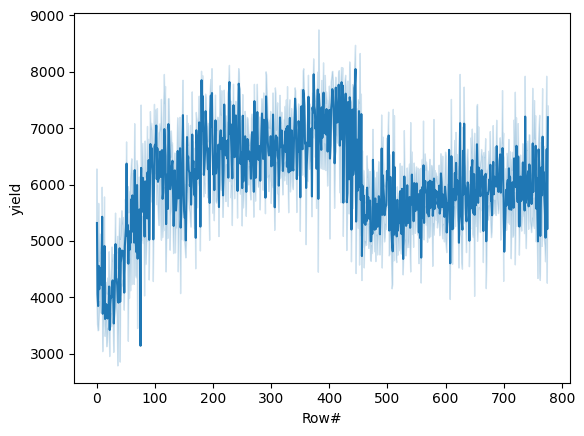

In [27]:
sns.lineplot(data=df, x="Row#", y="yield")
print(
    f"Correlation between Row# and target yield is {df["Row#"].corr(df["yield"]) :.4f}"
)
plt.show()

**Ans:** This is INSIGNIFICANT compared to every other attribute!

So, let's drop this noisy mf!

In [28]:
df_norow = df.drop("Row#", axis=1)
df_norow.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,12.5,0.25,0.25,0.25,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.421449,0.403129,31.394569,4952.01304
1,25.0,0.50,0.25,0.50,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.586603,0.490020,40.282376,7532.82953
2,12.5,0.25,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.483671,0.411591,34.781055,5715.00840
3,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.429001,0.398864,31.119881,4575.76991
4,12.5,0.25,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.546136,0.475965,39.096884,6801.32393


### Q. WTF is up with that middle box?

In [29]:
df_norow.iloc[:, 5:11].head()

,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange
id,,,,,,
0,94.6,57.2,79.0,68.2,33.0,55.9
1,94.6,57.2,79.0,68.2,33.0,55.9
2,69.7,42.1,58.2,50.2,24.3,41.2
3,69.7,42.1,58.2,50.2,24.3,41.2
4,77.4,46.8,64.7,55.8,27.0,45.8


As each of these columns can be used to derive some other for a different crop, each have an approximate correlation of 1!

So, we need to condense these down!

In [30]:
df_modified = df_norow.copy(deep=True)

UpperTRange = (
    df_modified[["MaxOfUpperTRange", "MinOfUpperTRange", "AverageOfUpperTRange"]]
    .mean(axis=1)
    .round(1)
)
LowerTRange = (
    df_modified[["MaxOfLowerTRange", "MinOfLowerTRange", "AverageOfLowerTRange"]]
    .mean(axis=1)
    .round(1)
)

df_modified.insert(8, "UpperTRange", UpperTRange)
df_modified.insert(12, "LowerTRange", LowerTRange)

df_modified.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,UpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,LowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,,,
0,12.5,0.25,0.25,0.25,0.50,94.6,57.2,79.0,76.9,68.2,33.0,55.9,52.4,34.0,0.56,0.421449,0.403129,31.394569,4952.01304
1,25.0,0.50,0.25,0.50,0.75,94.6,57.2,79.0,76.9,68.2,33.0,55.9,52.4,1.0,0.10,0.586603,0.490020,40.282376,7532.82953
2,12.5,0.25,0.25,0.50,0.75,69.7,42.1,58.2,56.7,50.2,24.3,41.2,38.6,24.0,0.39,0.483671,0.411591,34.781055,5715.00840
3,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,56.7,50.2,24.3,41.2,38.6,24.0,0.39,0.429001,0.398864,31.119881,4575.76991
4,12.5,0.25,0.25,0.50,0.75,77.4,46.8,64.7,63.0,55.8,27.0,45.8,42.9,1.0,0.10,0.546136,0.475965,39.096884,6801.32393


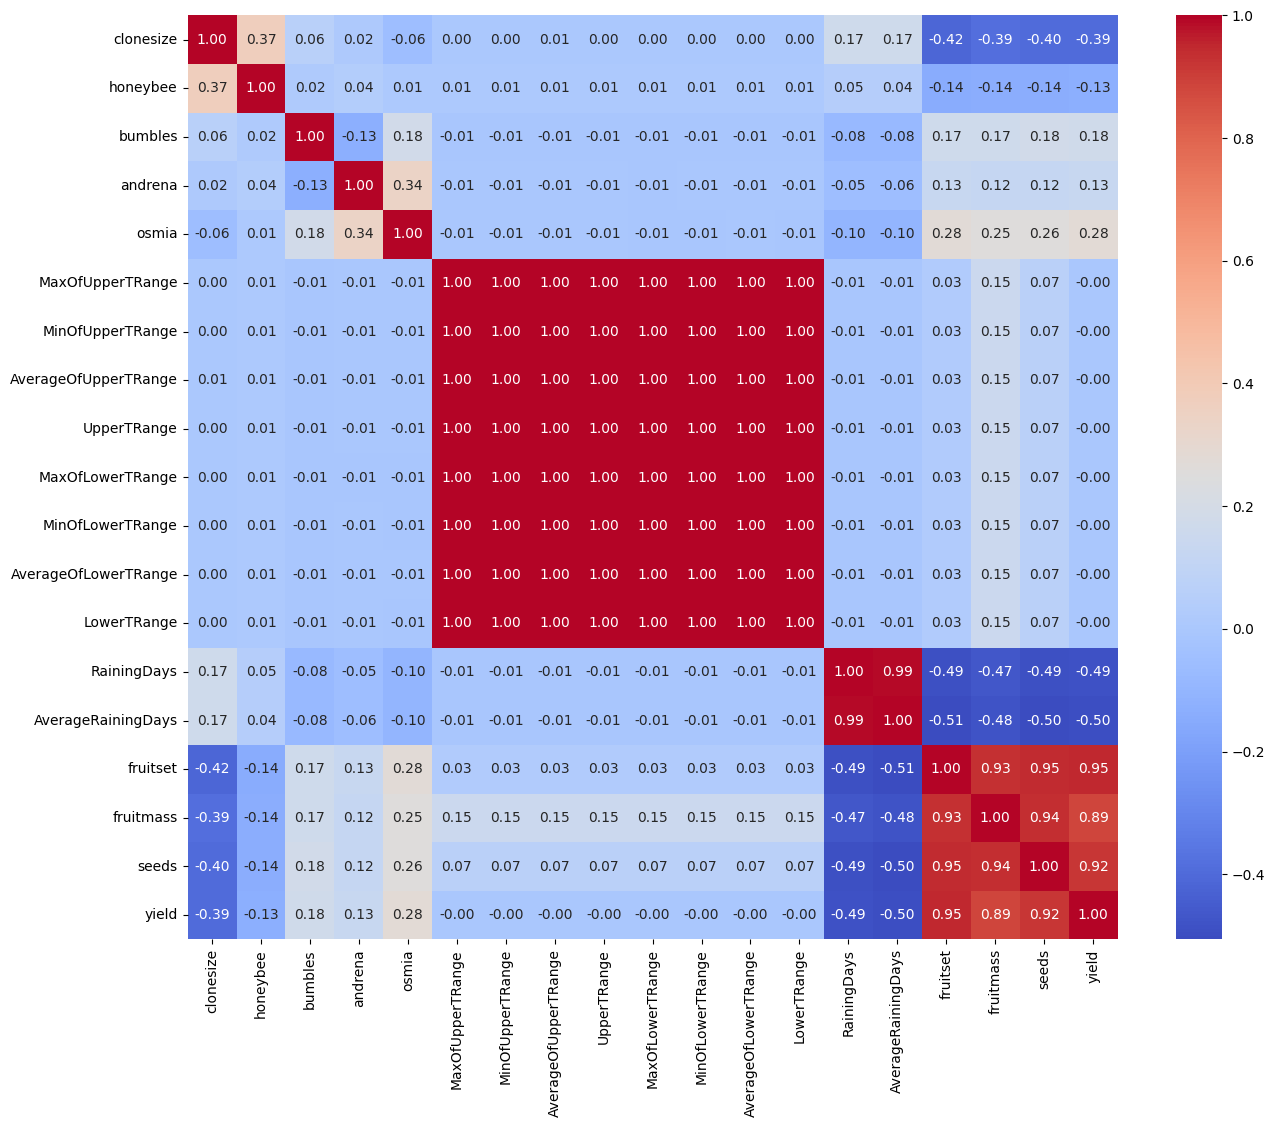

In [31]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_modified.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

We see that all temperatures don't effect yield that much BUT they do effect the fruitmass, pollinator population, etc. considerably, in the same amount!!!

So, we can drop the atomic attributes!

In [32]:
try:
    df_modified.drop(
        columns=[
            "MaxOfUpperTRange",
            "MinOfUpperTRange",
            "AverageOfUpperTRange",
            "MaxOfLowerTRange",
            "MinOfLowerTRange",
            "AverageOfLowerTRange",
        ],
        inplace=True,
    )
except:
    pass

df_modified.head()

,clonesize,honeybee,bumbles,andrena,osmia,UpperTRange,LowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,
0,12.5,0.25,0.25,0.25,0.50,76.9,52.4,34.0,0.56,0.421449,0.403129,31.394569,4952.01304
1,25.0,0.50,0.25,0.50,0.75,76.9,52.4,1.0,0.10,0.586603,0.490020,40.282376,7532.82953
2,12.5,0.25,0.25,0.50,0.75,56.7,38.6,24.0,0.39,0.483671,0.411591,34.781055,5715.00840
3,25.0,0.50,0.25,0.50,0.75,56.7,38.6,24.0,0.39,0.429001,0.398864,31.119881,4575.76991
4,12.5,0.25,0.25,0.50,0.75,63.0,42.9,1.0,0.10,0.546136,0.475965,39.096884,6801.32393


### Multicollinearity - Raining Days

Imagine you're a plant or a bee. You expect a certain amount of rain (the average). When there’s more or less rain than that — say, sudden heavy rains or drought — it could drastically affect:

🌸 Flower growth

🐝 Pollinator activity

🌱 Fruit/seed yield

So, just knowing "RainingDays = 10" doesn’t tell us much. But knowing it’s 3 more than usual is insightful.

In [33]:
try:
    df_modified.insert(
        7, "RainingDiff", df_modified["RainingDays"] - df_modified["AverageRainingDays"]
    )
    df_modified.drop(columns=["RainingDays", "AverageRainingDays"], inplace=True)
except:
    pass
df_modified.head()

,clonesize,honeybee,bumbles,andrena,osmia,UpperTRange,LowerTRange,RainingDiff,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,
0,12.5,0.25,0.25,0.25,0.50,76.9,52.4,33.44,0.421449,0.403129,31.394569,4952.01304
1,25.0,0.50,0.25,0.50,0.75,76.9,52.4,0.90,0.586603,0.490020,40.282376,7532.82953
2,12.5,0.25,0.25,0.50,0.75,56.7,38.6,23.61,0.483671,0.411591,34.781055,5715.00840
3,25.0,0.50,0.25,0.50,0.75,56.7,38.6,23.61,0.429001,0.398864,31.119881,4575.76991
4,12.5,0.25,0.25,0.50,0.75,63.0,42.9,0.90,0.546136,0.475965,39.096884,6801.32393


### Q. What's up with the fruits? Multicollinearity again?

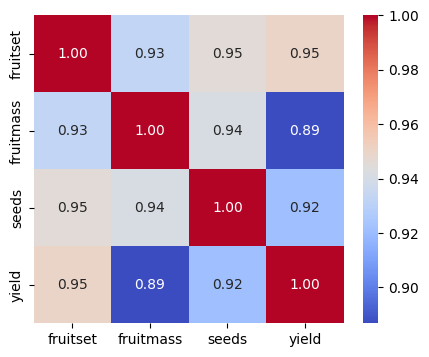

In [34]:
plt.figure(figsize=(5, 4))
sns.heatmap(
    df_modified.iloc[:, -4:].corr().abs(), annot=True, fmt=".2f", cmap="coolwarm"
)
plt.show()

Again, I would happily drop 2 out of these 3 cause rest can be told by others. BUT, all of these vars have high correlation vals. So, let's just leave them be (for now).

### FINAL HEATMAP

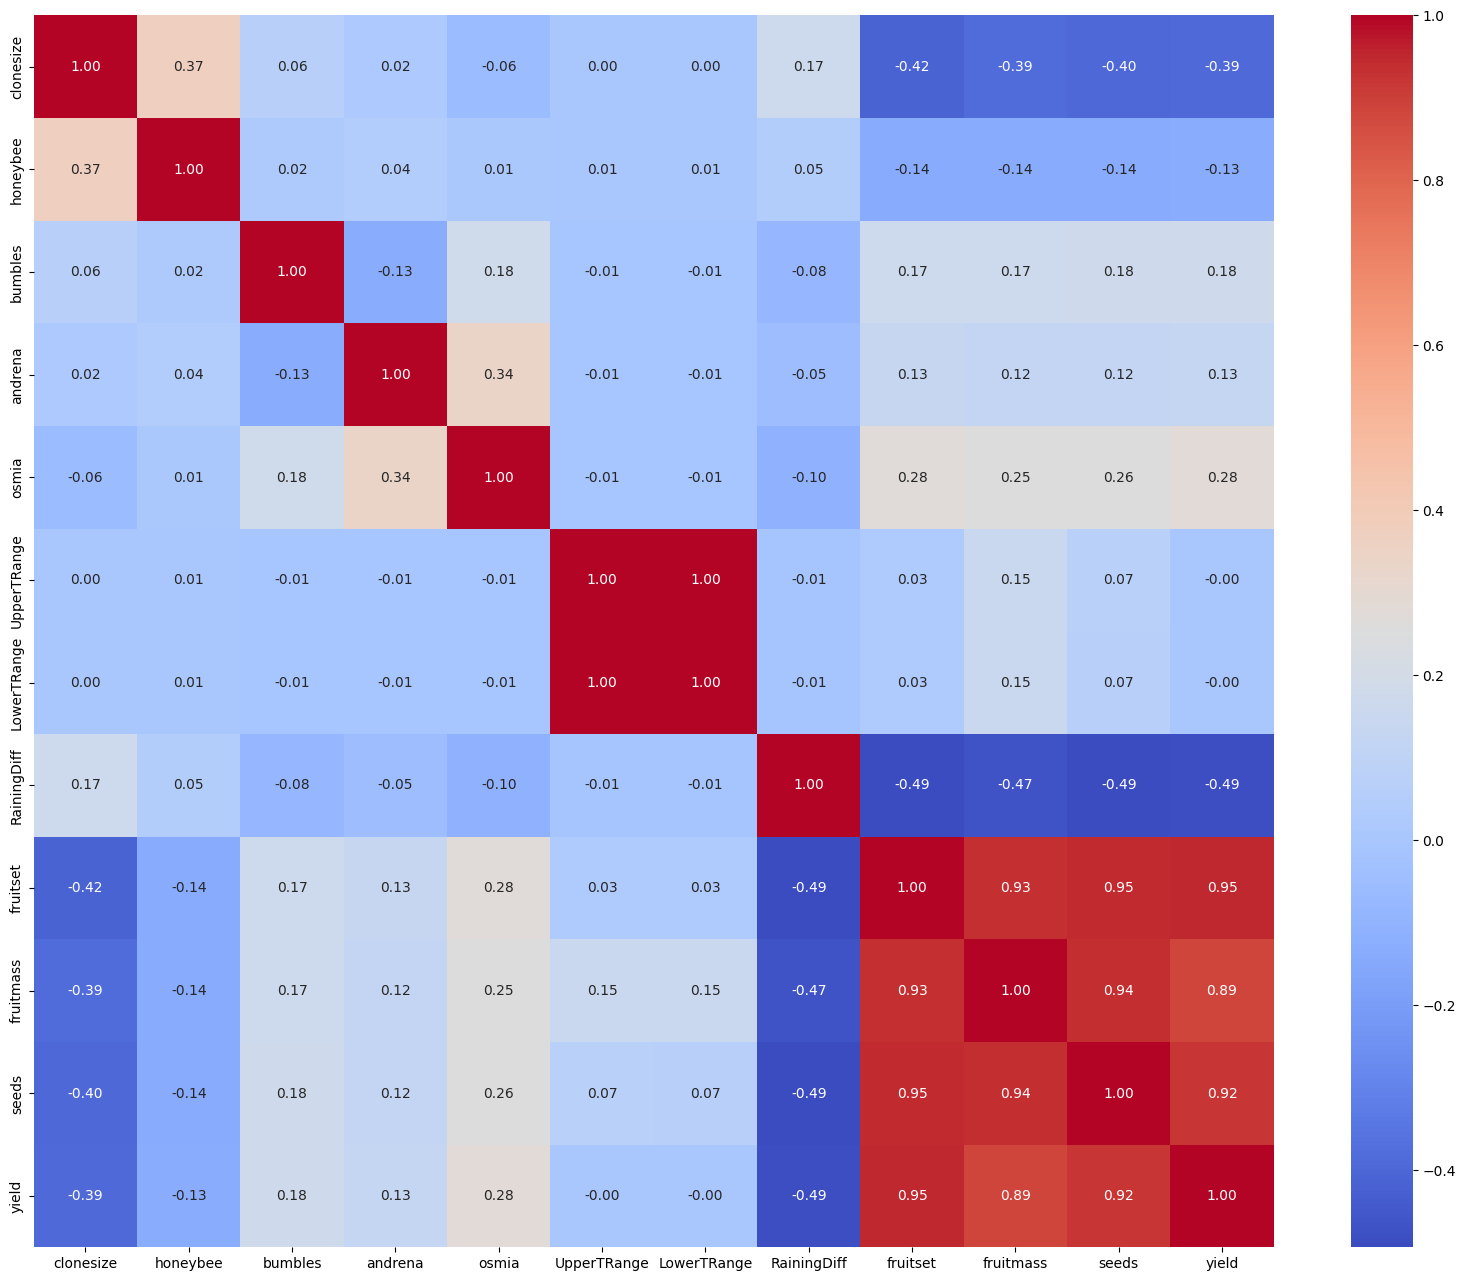

In [35]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_modified.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

## Submission 2 - Using a better model

We can see some places have DRASTIC differences in correlation values - so maybe a tree-based model?

In [36]:
df_train = df_modified[~(df_modified["yield"].isna())]
df_test = df_modified[df_modified["yield"].isna()].drop("yield", axis=1)

In [37]:
X = df_train.drop("yield", axis=1)
y = df_train["yield"]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model = model.fit(X_train, y_train)

In [40]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)  # type: ignore
print("Mean Absolute Error (MAE):", mae)
print("Test R²:", r2_score(y_valid, y_pred))  # type: ignore

Mean Absolute Error (MAE): 265.5061041258667
Test R²: 0.9127742796643765


HELL YESSSS!

In [41]:
result = model.predict(df_test)
print(result)

[5296.6544861 4430.6051361 7344.8014591 ... 4677.2143331 6133.2569694
 8198.2992644]


In [42]:
df_result = df_test.copy()
df_result["yield"] = result

In [43]:
df_result["yield"].to_csv("result.csv")

In [44]:
# !kaggle competitions submit -c thapar-summer-school-2025-hack-ii -f result.csv -m "Message"

## Submission 3 - An even better model???

The idea of boosting methods is to combine/ensemble several weak learners to form a stronger one. The main ones are summed up in the table below:

| Adaptive boosting | Gradient boosting |
| ----------------- | ----------------- |
| High weights are put on errors to improve at the next boosting step | Weak learners are trained on residuals |
| Known as Adaboost	| Examples include XGBoost, LightGBM, CatBoost, etc. |

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [46]:
from sklearn.ensemble import AdaBoostRegressor

aboost = AdaBoostRegressor(random_state=42)

aboost = aboost.fit(X_train, y_train)

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    random_state=42,
    verbose=False,
)

gbr = gbr.fit(X_train, y_train)

In [48]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)

xgb = xgb.fit(X_train, y_train)

In [49]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(random_state=42)

lgb = lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 10500, number of used features: 11
[LightGBM] [Info] Start training from score 5995.515185


In [50]:
from catboost import CatBoostRegressor

cboost = CatBoostRegressor(random_seed=42, verbose=False)

cboost = cboost.fit(X_train, y_train)

In [51]:
from sklearn.metrics import mean_absolute_error, r2_score

for model in (aboost, gbr, xgb, lgb, cboost):
    print(f"\n\n{model}:-")

    # Training
    print("\nFOR TRAINING SET:-")
    y_pred = model.predict(X_train)
    mae = mean_absolute_error(y_train, y_pred)  # type: ignore
    print("Mean Absolute Error (MAE):", mae)
    print("R\u00b2:", r2_score(y_train, y_pred))  # type: ignore

    # Testing
    print("\nFOR VALIDATION SET:-")
    y_pred = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)  # type: ignore
    print("Mean Absolute Error (MAE):", mae)
    print("R\u00b2:", r2_score(y_valid, y_pred))  # type: ignore



AdaBoostRegressor(random_state=42):-

FOR TRAINING SET:-
Mean Absolute Error (MAE): 382.3221460620989
R²: 0.8500468522257383

FOR VALIDATION SET:-
Mean Absolute Error (MAE): 386.0867542622236
R²: 0.8382887405707707


GradientBoostingRegressor(random_state=42, verbose=False):-

FOR TRAINING SET:-
Mean Absolute Error (MAE): 236.64592392847678
R²: 0.930727647358092

FOR VALIDATION SET:-
Mean Absolute Error (MAE): 250.9351825886807
R²: 0.9207974014283071


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_dept

Taking MAE for validation and minimum overfitting, it's clear that GBR, XGB, LGBM and CatBoost all have their own ups and downs!

In [52]:
result = gbr.predict(df_test)
print(result)

[5395.59988302 4626.17679509 7366.72436827 ... 4716.38609063 5930.58476315
 8028.25648691]


In [53]:
df_result = df_test.copy()
df_result["yield"] = result
df_result["yield"].to_csv("result.csv")

In [54]:
# !kaggle competitions submit -c thapar-summer-school-2025-hack-ii -f result.csv -m "Message"

## SUBMISSION 4 - Trying STACKING (ENSEMBLE)

In [55]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Defining stack
stack = StackingRegressor(
    estimators=[
        ("gbr", gbr),
        ("xgb", xgb),
        ("lgbm", lgb),
        ("cat", cboost),  # type: ignore
    ],
    final_estimator=Ridge(alpha=1.0),
    cv=10,
    n_jobs=-1,
    passthrough=False,
    verbose=False,
)

stack = stack.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 10500, number of used features: 11
[LightGBM] [Info] Start training from score 5995.515185
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 814
[LightGBM] [Info] Number of data points in the train set: 9450, number of used features: 11
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 814
[LightGBM] [Info] Number of data points in the train set: 9450, number of used features: 11
[LightGBM] [Info] 

In [56]:
from sklearn.metrics import mean_absolute_error, r2_score

# Training
print("\nFOR TRAINING SET:-")
y_pred = stack.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)  # type: ignore
print("Stack MAE:", mae)
print("Stack R\u00b2:", r2_score(y_train, y_pred))  # type: ignore

# Testing
print("\nFOR VALIDATION SET:-")
y_pred = stack.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)  # type: ignore
print("Stack MAE:", mae)
print("Stack R\u00b2:", r2_score(y_valid, y_pred))  # type: ignore


FOR TRAINING SET:-
Stack MAE: 220.28528674401014
Stack R²: 0.9412817251613624

FOR VALIDATION SET:-
Stack MAE: 250.93974728905988
Stack R²: 0.9210738565175693


Alright, we managed to use XGB's good training with GBR's great validation strength, along with LGBM and CatBoost's categorical specialty

In [57]:
result = stack.predict(df_test)
print(result)

[5402.53549328 4624.82916348 7361.93386776 ... 4706.35751856 5933.22750933
 8144.08917372]


In [58]:
df_result["yield"] = result
df_result["yield"].to_csv("result.csv")

In [59]:
# !kaggle competitions submit -c thapar-summer-school-2025-hack-ii -f result.csv -m "Message"

YESSSS!

## Outlier Removal

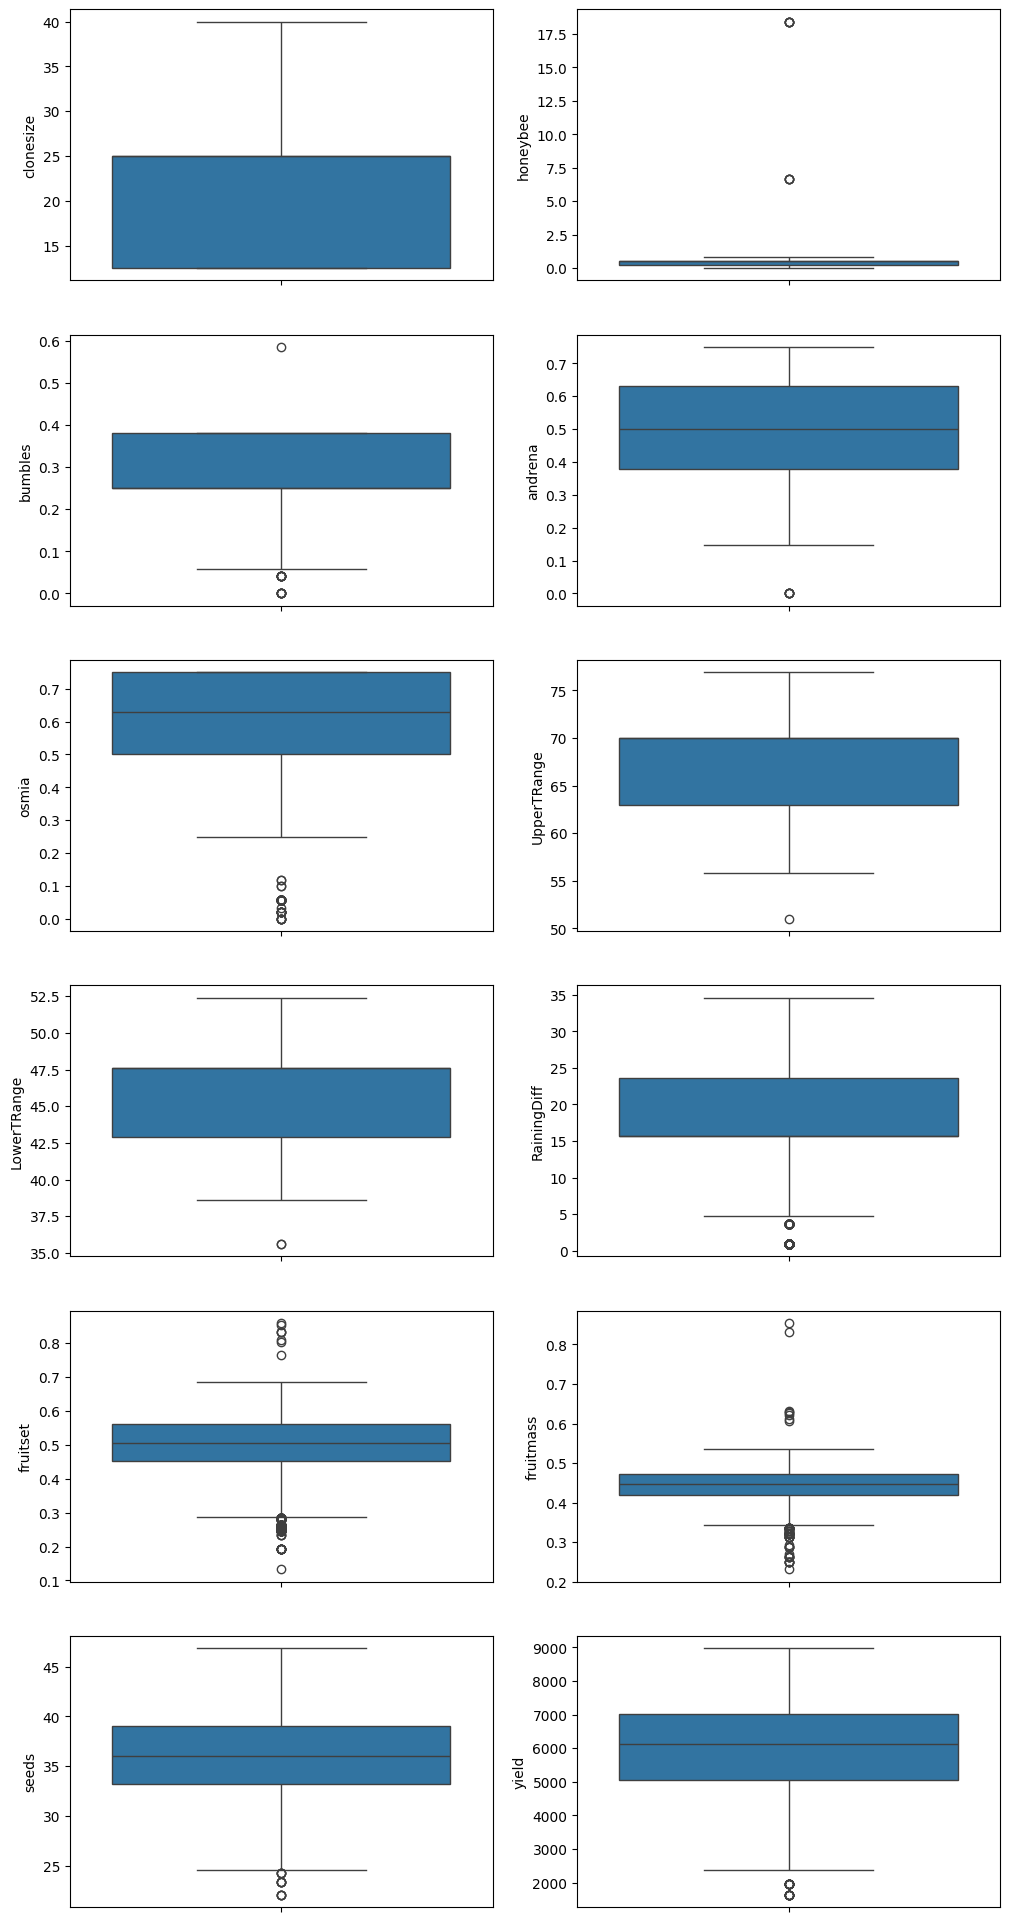

In [60]:
plt.figure(figsize=(12, 50))
for i, col in enumerate(df_modified.columns, start=1):
    plt.subplot(len(df_modified.columns), 2, i)
    sns.boxplot(df_modified[col])

There are some suspicious outliers here...

In [61]:
df_out = df_train.copy()
for col in df_out.columns:
    Q1 = df_modified[col].quantile(0.25)
    Q3 = df_modified[col].quantile(0.75)
    IQR = Q3 - Q1
    l = Q1 - 1.5 * IQR
    u = Q3 + 1.5 * IQR
    df_out = df_out[((df_out[col] >= l) & (df_out[col] <= u))]

df_out.shape

(11191, 12)

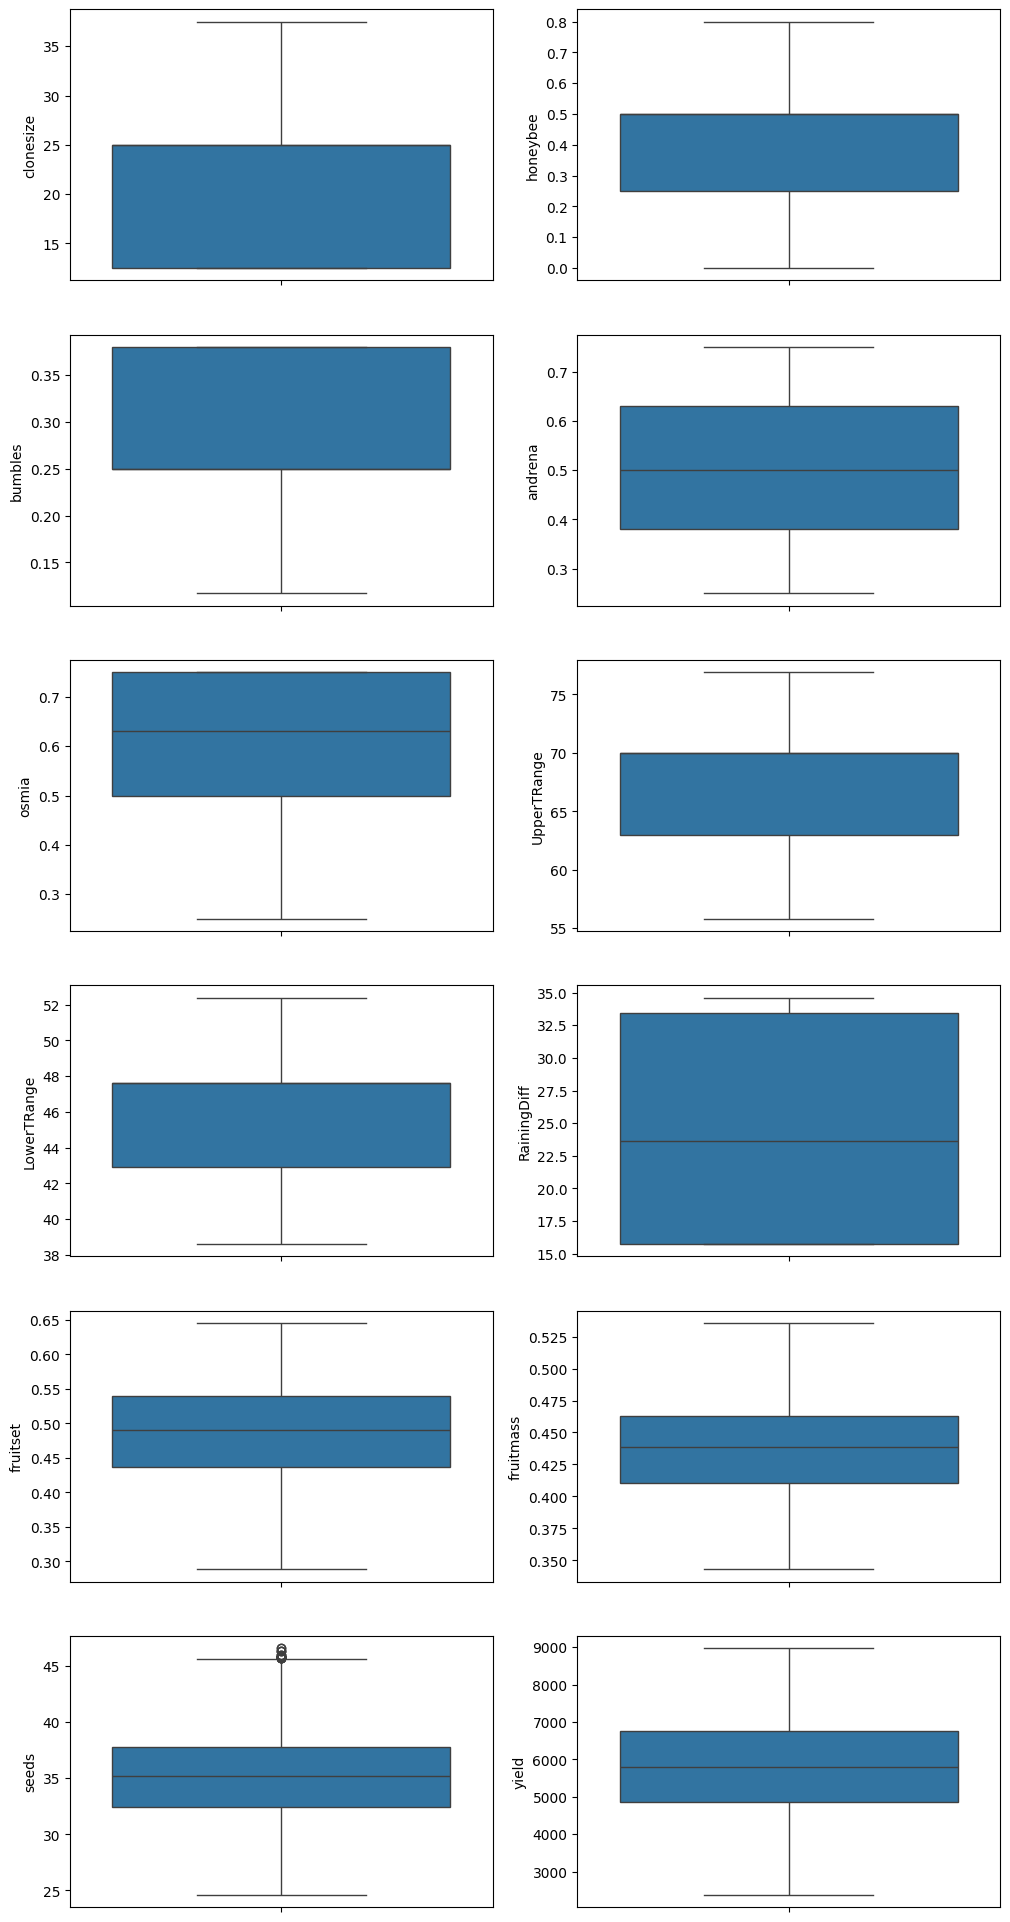

In [62]:
plt.figure(figsize=(12, 50))
for i, col in enumerate(df_out.columns):
    plt.subplot(len(df_out.columns), 2, i + 1)
    sns.boxplot(df_out[col])

There, much more clean!

## Submission 5 - How bad did I fuck up?

In [63]:
X = df_out.drop("yield", axis=1)
y = df_out["yield"]

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=42
)

stack = stack.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 7833, number of used features: 11
[LightGBM] [Info] Start training from score 5774.595492
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 7050, number of used features: 11
[LightGBM] [Info] Start training from score 5766.912780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

In [65]:
from sklearn.metrics import mean_absolute_error, r2_score

# Training
print("\nFOR TRAINING SET:-")
y_pred = stack.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)  # type: ignore
print("Outlier MAE:", mae)
print("Outlier R\u00b2:", r2_score(y_train, y_pred))  # type: ignore

# Testing
print("\nFOR VALIDATION SET:-")
y_pred = stack.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)  # type: ignore
print("Outlier MAE:", mae)
print("Outlier R\u00b2:", r2_score(y_valid, y_pred))  # type: ignore


FOR TRAINING SET:-
Outlier MAE: 217.69196397891216
Outlier R²: 0.9409241317060641

FOR VALIDATION SET:-
Outlier MAE: 236.77339267957112
Outlier R²: 0.9272605780714677


Nice! It apparently worked!

In [66]:
result = stack.predict(df_test)
print(result)

[5360.4217601  4566.45223033 7375.43252889 ... 4742.57845178 6130.28619376
 8276.10462403]


In [67]:
df_result["yield"] = result
df_result["yield"].to_csv("result.csv")

In [68]:
# !kaggle competitions submit -c thapar-summer-school-2025-hack-ii -f result.csv -m "Message"

Nope! `df_out` is not good! Apparently, the outliers mean something...

## Trying log-transform on some features

In [69]:
df_train = df_modified[~(df_modified["yield"].isna())]
df_test = df_modified[df_modified["yield"].isna()].drop("yield", axis=1)

In [70]:
X = df_train.drop("yield", axis=1)
y = np.log1p(df_train["yield"])

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

log_stack = stack.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 11
[LightGBM] [Info] Start training from score 8.669611
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 10800, number of used features: 11
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 10800, number of used features: 11[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing wa

In [72]:
from sklearn.metrics import mean_absolute_error, r2_score

# Training
print("\nFOR TRAINING SET:-")
y_pred = np.expm1(log_stack.predict(X_train))
y_train = np.expm1(y_train)
mae = mean_absolute_error(y_train, y_pred)  # type: ignore
print("Log-transformed MAE:", mae)
print("Log-transformed R\u00b2:", r2_score(y_train, y_pred))  # type: ignore

# Testing
print("\nFOR VALIDATION SET:-")
y_pred = np.expm1(log_stack.predict(X_valid))
y_valid = np.expm1(y_valid)
mae = mean_absolute_error(y_valid, y_pred)  # type: ignore
print("Log-transformed MAE:", mae)
print("Log-transformed R\u00b2:", r2_score(y_valid, y_pred))  # type: ignore


FOR TRAINING SET:-
Log-transformed MAE: 227.5448483605201
Log-transformed R²: 0.93777980724368

FOR VALIDATION SET:-
Log-transformed MAE: 248.63025975157467
Log-transformed R²: 0.9202010721164067


Eh, it didn't work as well as expected...

## Hyperparameter Tuning

We'll use a library called `Optuna`!

In [73]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/E2b3SKMw934?si=pZUwB9pvBDeMZdLi" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [93]:
df_train = df_modified[~(df_modified["yield"].isna())]
df_test = df_modified[df_modified["yield"].isna()].drop("yield", axis=1)

In [94]:
X = df_train.drop("yield", axis=1)
y = df_train["yield"]

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

I'll be using Optuna to choose hyperparameters for the Stacked Regressor.

In [78]:
import optuna
from optuna.visualization import plot_param_importances
from sklearn.model_selection import cross_val_score

In [82]:
def objective_gbr(trial):
    model = GradientBoostingRegressor(
        n_estimators=trial.suggest_int("n_estimators", 1000, 2500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        max_depth=trial.suggest_int("max_depth", 3, 10),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 20),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 20),
        subsample=trial.suggest_float("subsample", 0.5, 1.0),
        max_features=trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
    )
    return cross_val_score(
        model, X_train, y_train, cv=3, scoring="neg_mean_absolute_error"
    ).mean()


study_gbr = optuna.create_study(
    study_name="GBR Hyperparameter Tuning", direction="maximize"
)
study_gbr.optimize(objective_gbr, n_trials=10)

plot_param_importances(study_gbr)

[I 2025-07-01 01:58:45,904] A new study created in memory with name: GBR Hyperparameter Tuning
[I 2025-07-01 01:58:53,873] Trial 0 finished with value: -250.64358695046 and parameters: {'n_estimators': 1159, 'learning_rate': 0.022528510538028616, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10, 'subsample': 0.5447458992793668, 'max_features': 'sqrt'}. Best is trial 0 with value: -250.64358695046.
[I 2025-07-01 01:59:43,971] Trial 1 finished with value: -268.9847384588664 and parameters: {'n_estimators': 1285, 'learning_rate': 0.048528860669523034, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 1, 'subsample': 0.933360563929223, 'max_features': None}. Best is trial 0 with value: -250.64358695046.
[I 2025-07-01 02:00:27,871] Trial 2 finished with value: -300.4885968665199 and parameters: {'n_estimators': 1366, 'learning_rate': 0.1648437965610242, 'max_depth': 7, 'min_samples_split': 17, 'min_samples_leaf': 11, 'subsample': 0.7379073537802692, 'max_features': N

In [85]:
def objective_xgb(trial):
    model = XGBRegressor(
        n_estimators=trial.suggest_int("n_estimators", 1000, 2500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        max_depth=trial.suggest_int("max_depth", 3, 10),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
        gamma=trial.suggest_float("gamma", 0, 10),
        subsample=trial.suggest_float("subsample", 0.5, 1),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.5, 1),
        reg_alpha=trial.suggest_float("reg_alpha", 1, 10),
        reg_lambda=trial.suggest_float("reg_lambda", 1, 10),
        verbosity=0,
    )
    return cross_val_score(
        model, X_train, y_train, cv=3, scoring="neg_mean_absolute_error"
    ).mean()


study_xgb = optuna.create_study(
    study_name="XGB Hyperparameter Tuning", direction="maximize"
)
study_xgb.optimize(objective_xgb, n_trials=5)

plot_param_importances(study_xgb)

[I 2025-07-01 02:08:52,986] A new study created in memory with name: XGB Hyperparameter Tuning
[I 2025-07-01 02:09:55,777] Trial 0 finished with value: -272.30859519509113 and parameters: {'n_estimators': 1537, 'learning_rate': 0.1044380469703064, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 7.433455389994753, 'subsample': 0.6308954166525784, 'colsample_bytree': 0.9735735694129726, 'reg_alpha': 8.641660922284258, 'reg_lambda': 1.3309089644078105}. Best is trial 0 with value: -272.30859519509113.
[I 2025-07-01 02:11:16,726] Trial 1 finished with value: -312.440664345511 and parameters: {'n_estimators': 1061, 'learning_rate': 0.2653304444088602, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 1.7114614481810553, 'subsample': 0.6819742145790483, 'colsample_bytree': 0.7854889682542268, 'reg_alpha': 2.513257859129126, 'reg_lambda': 2.3055852443182947}. Best is trial 0 with value: -272.30859519509113.
[I 2025-07-01 02:14:32,790] Trial 2 finished with value: -288.0308043533724 and paramete

The depth of the tree and the learning rate matter much, much more than other features!

In [97]:
def objective_lgb(trial):
    model = LGBMRegressor(
        n_estimators=trial.suggest_int("n_estimators", 1000, 2500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
        max_depth=trial.suggest_int("max_depth", 3, 10),
        reg_lambda=trial.suggest_float("reg_lambda", 1, 10),
        objective="mae",
        random_state=42,
        verbose=-1,
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    return mean_absolute_error(y_valid, y_pred)  # type: ignore


study_lgb = optuna.create_study(
    study_name="LGBM Hyperparameter Tuning", direction="minimize"
)
study_lgb.optimize(objective_lgb, n_trials=50)

plot_param_importances(study_lgb)

[I 2025-07-01 02:42:30,969] A new study created in memory with name: LGBM Hyperparameter Tuning
[I 2025-07-01 02:42:31,397] Trial 0 finished with value: 245.76427088929867 and parameters: {'n_estimators': 1235, 'learning_rate': 0.11733228433612428, 'max_depth': 4, 'reg_lambda': 5.592922579762514}. Best is trial 0 with value: 245.76427088929867.
[I 2025-07-01 02:42:32,258] Trial 1 finished with value: 249.41159103543916 and parameters: {'n_estimators': 2200, 'learning_rate': 0.16464061778847877, 'max_depth': 5, 'reg_lambda': 2.654303913177885}. Best is trial 0 with value: 245.76427088929867.
[I 2025-07-01 02:42:32,766] Trial 2 finished with value: 246.68165708678282 and parameters: {'n_estimators': 1666, 'learning_rate': 0.1849679987960163, 'max_depth': 3, 'reg_lambda': 6.788717877055886}. Best is trial 0 with value: 245.76427088929867.
[I 2025-07-01 02:42:33,641] Trial 3 finished with value: 253.97081618893682 and parameters: {'n_estimators': 1548, 'learning_rate': 0.2304564845546014, 

In [98]:
def objective_cat(trial):
    model = CatBoostRegressor(
        iterations=trial.suggest_int("iterations", 1000, 2500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1, 10),
        loss_function="MAE",
        verbose=0,
        random_state=42,
    )

    model.fit(
        X_train,
        y_train,
        eval_set=(X_valid, y_valid),
        early_stopping_rounds=100,
        verbose=0,
    )
    y_pred = model.predict(X_valid)
    return mean_absolute_error(y_valid, y_pred)


study_cat = optuna.create_study(
    study_name="CatBoost Hyperparameter Tuning", direction="minimize"
)
study_cat.optimize(objective_cat, n_trials=50)

plot_param_importances(study_cat)

[I 2025-07-01 02:43:12,245] A new study created in memory with name: CatBoost Hyperparameter Tuning
[I 2025-07-01 02:43:13,078] Trial 0 finished with value: 250.60982934084572 and parameters: {'iterations': 1340, 'learning_rate': 0.11486527945882043, 'depth': 8, 'l2_leaf_reg': 2.908482796793089}. Best is trial 0 with value: 250.60982934084572.
[I 2025-07-01 02:43:14,497] Trial 1 finished with value: 256.72465017323566 and parameters: {'iterations': 1253, 'learning_rate': 0.23405394753060105, 'depth': 10, 'l2_leaf_reg': 7.281293111360849}. Best is trial 0 with value: 250.60982934084572.
[I 2025-07-01 02:43:15,048] Trial 2 finished with value: 246.99954727830652 and parameters: {'iterations': 1720, 'learning_rate': 0.17361882699667996, 'depth': 4, 'l2_leaf_reg': 9.137795189170713}. Best is trial 2 with value: 246.99954727830652.
[I 2025-07-01 02:43:16,293] Trial 3 finished with value: 246.42315560300912 and parameters: {'iterations': 2186, 'learning_rate': 0.06556605881231044, 'depth': 4

In [ ]:
# Building the best out of these 4 models into the stack...
lgb_best = LGBMRegressor(
    objective="MAE", random_state=42, **study_lgb.best_params, verbosity=-1
)
cat_best = CatBoostRegressor(
    loss_function="MAE", random_state=42, **study_cat.best_params, verbose=0
)

stack = StackingRegressor(estimators=[("lgb", lgb_best), ("cat", cat_best)])  # type: ignore

In [104]:
stack = stack.fit(X_train, y_train)

In [105]:
y_pred = stack.predict(X_valid)
print("MAE:", mean_absolute_error(y_valid, y_pred))
print("R2 Score:", r2_score(y_valid, y_pred))

MAE: 250.65589549011628
R2 Score: 0.9204874077199489


Yes, there's an improvement - No overfitting!

In [106]:
result = stack.predict(df_test)
df_result = df_test.copy()
df_result["yield"] = result
df_result["yield"].to_csv("result.csv")

In [107]:
# !kaggle competitions submit -c thapar-summer-school-2025-hack-ii -f result.csv -m "Optuna"

100%|████████████████████████████████████████| 235k/235k [00:17<00:00, 13.9kB/s]
Successfully submitted to Thapar Summer School 2025 | Hack-II

## Trying a different Ensembling Method

  - During validation : **30% CatBoost + 70% LightGBM**
  - During final prediction: **50% CatBoost + 50% LightGBM**

In [110]:
lgbm_model = LGBMRegressor(
    objective="MAE", random_state=42, **study_lgb.best_params, verbosity=-1
)
catboost_model = CatBoostRegressor(
    loss_function="MAE", random_state=42, **study_cat.best_params, verbose=0
)

In [111]:
catboost_model.fit(
    X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100, verbose=0
)
preds_cb = catboost_model.predict(X_valid)
preds_cb

array([6371.1638433 , 5664.96400891, 7354.5467281 , ..., 8176.85544359,
       5778.37988227, 5226.154546  ], shape=(3000,))

In [112]:
lgbm_model.fit(X_train, y_train)
preds_lgbm = lgbm_model.predict(X_valid)
preds_lgbm

array([6458.48466953, 5606.53545021, 7321.6408385 , ..., 8188.07029783,
       5757.51634272, 5291.67768878], shape=(3000,))

In [123]:
ensemble_preds = 0.5 * preds_cb + 0.5 * preds_lgbm  # type: ignore
mae_ensemble = mean_absolute_error(y_valid, ensemble_preds)
print(f"MAE from new ensemble: {mae_ensemble:.6f}")

MAE from new ensemble: 243.517865


Whoa, that's an amazing improvement!

In [115]:
catboost_model = catboost_model.fit(X, y, verbose=0)
lgbm_model = lgbm_model.fit(X, y)

**NOTE:** Instead of fit on X_train and y_train for final dataset, I did it on X and y!!!

In [117]:
final_preds_cb = catboost_model.predict(df_test)
final_preds_lgbm = lgbm_model.predict(df_test)
final_preds = 0.5 * final_preds_cb + 0.5 * final_preds_lgbm  # type: ignore
final_preds

array([5411.87988714, 4570.90332032, 7340.52048296, ..., 4718.2648503 ,
       5954.710205  , 8386.75197056], shape=(10000,))

In [118]:
df_result = df_test.copy()
df_result["yield"] = final_preds
df_result["yield"].to_csv("result.csv")

In [119]:
# !kaggle competitions submit -c thapar-summer-school-2025-hack-ii -f result.csv -m "Optuna"

100%|████████████████████████████████████████| 235k/235k [00:03<00:00, 71.3kB/s]
Successfully submitted to Thapar Summer School 2025 | Hack-II

Holy shit, I did it!